In [42]:
import os
import glob
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

## Create Documents

In [103]:
cats = ['sports', 'reading', 'politics_news', 'music', 'gaming', 'art']

In [104]:
documents = []

In [105]:
for cat in cats:
    os.chdir(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\Text\{cat}\Processed')
    files = glob.glob('*.json')
    for file in files:
        with open(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\Text\{cat}\Processed\{file}', 'r') as f:
            comments = json.load(f)
        documents.append((' '.join([comment['comment'] for comment in comments]), file.split('.json')[0], cat))

In [106]:
documents = np.array(documents)

In [107]:
documents[:, 1]

array(['cfb', 'nba', 'nfl', 'soccer', 'bookclub', 'books',
       'booksdiscussion', 'currentlyreading', 'suggestmeabook', 'news',
       'PoliticalHumor', 'politics', 'worldnews', 'guitar', 'Learnmusic',
       'musicology', 'musictheory', 'singing', 'games', 'gaming',
       'pcgaming', 'ps4', 'xboxone', 'art', 'drawing', 'painting',
       'photography', 'pixelart'], dtype='<U215897')

In [108]:
documents[:, 2]

array(['sports', 'sports', 'sports', 'sports', 'reading', 'reading',
       'reading', 'reading', 'reading', 'politics_news', 'politics_news',
       'politics_news', 'politics_news', 'music', 'music', 'music',
       'music', 'music', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming',
       'art', 'art', 'art', 'art', 'art'], dtype='<U215897')

## Create Document Vectors

In [109]:
vectorizer = TfidfVectorizer(strip_accents='unicode')
X = vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

## Plot Document Vectors in 2 Dimensions

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
colors = {'sports': ['red', 0], 'reading': ['blue', 0], 'politics_news': ['green', 0], 'music': ['orange', 0], 'gaming': ['black', 0], 'art': ['yellow', 0]}

In [112]:
def get_label(i, colors, documents):
    if colors[documents[i][2]][1] == 0:
        colors[documents[i][2]][1] += 1
        return documents[i][2]
    else:
        return ""

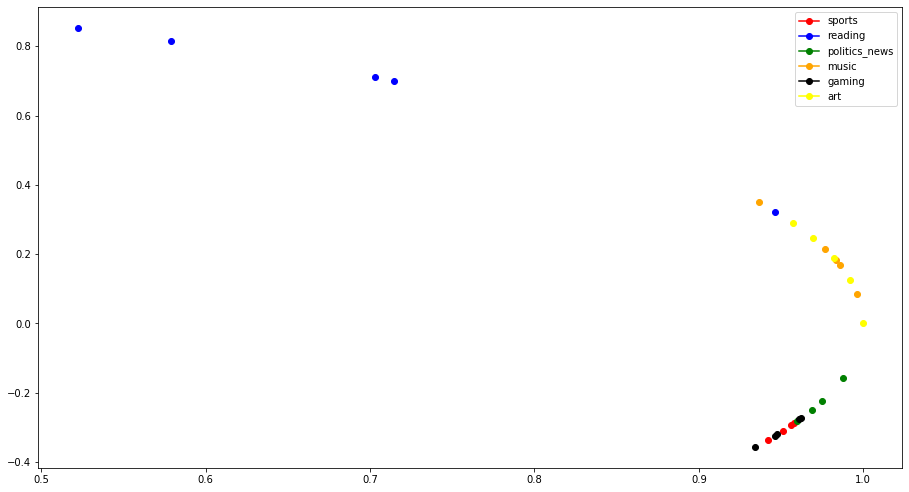

In [113]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][2]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()

## Word Clouds

In [114]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**The art subreddits:**

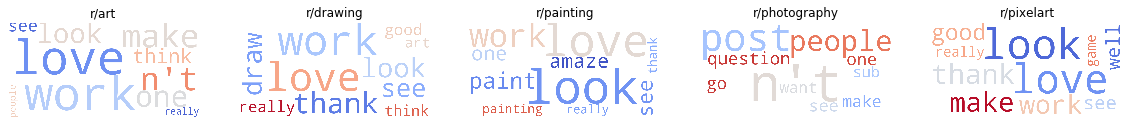

In [117]:
art_subs = documents[documents[:, 2] == 'art']

fig, ax = plt.subplots(ncols=len(art_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(art_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{art_subs[i][1]}')

**The gaming subreddits:**

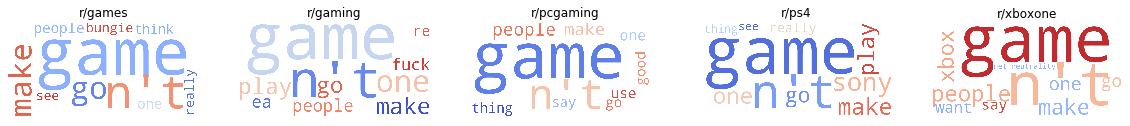

In [118]:
gaming_subs = documents[documents[:, 2] == 'gaming']

fig, ax = plt.subplots(ncols=len(gaming_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(gaming_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{gaming_subs[i][1]}')

**The music subreddits:**

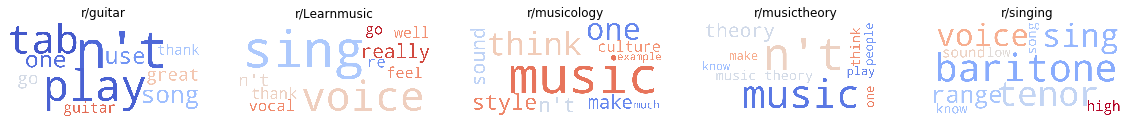

In [119]:
music_subs = documents[documents[:, 2] == 'music']

fig, ax = plt.subplots(ncols=len(music_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(music_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{music_subs[i][1]}')

**The politics/news subreddits:**

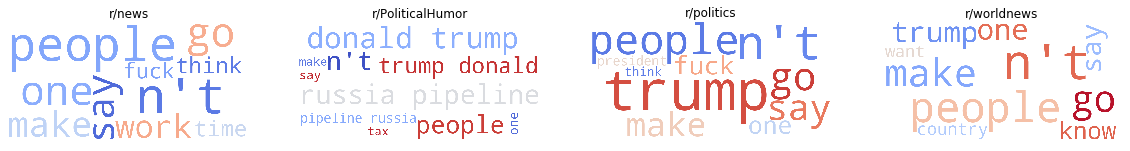

In [120]:
politics_news_subs = documents[documents[:, 2] == 'politics_news']

fig, ax = plt.subplots(ncols=len(politics_news_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(politics_news_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{politics_news_subs[i][1]}')

**The Reading subreddits:**

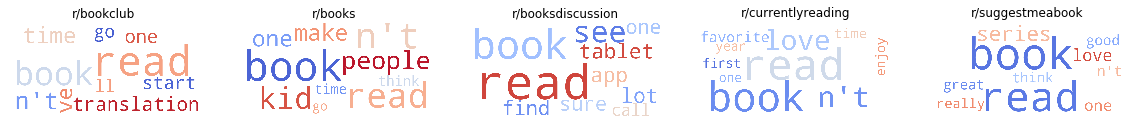

In [100]:
reading_subs = documents[documents[:, 2] == 'reading']

fig, ax = plt.subplots(ncols=len(reading_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(reading_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{reading_subs[i][1]}')

**The sports subreddits**:

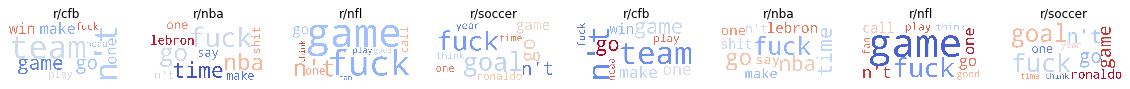

In [101]:
sports_subs = documents[documents[:, 2] == 'sports']

fig, ax = plt.subplots(ncols=len(sports_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(sports_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{sports_subs[i][1]}')